In [5]:
!pip install tensorflow

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
df_spam = pd.read_csv("spam_ham_dataset.csv")

In [11]:
print(df_spam)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [15]:
df_spam.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [17]:
df_spam.groupby('label').describe().T

label                     ham        spam
Unnamed: 0 count  3672.000000  1499.00000
           mean   1835.500000  4421.00000
           std    1060.159422   432.86834
           min       0.000000  3672.00000
           25%     917.750000  4046.50000
           50%    1835.500000  4421.00000
           75%    2753.250000  4795.50000
           max    3671.000000  5170.00000
label_num  count  3672.000000  1499.00000
           mean      0.000000     1.00000
           std       0.000000     0.00000
           min       0.000000     1.00000
           25%       0.000000     1.00000
           50%       0.000000     1.00000
           75%       0.000000     1.00000
           max       0.000000     1.00000

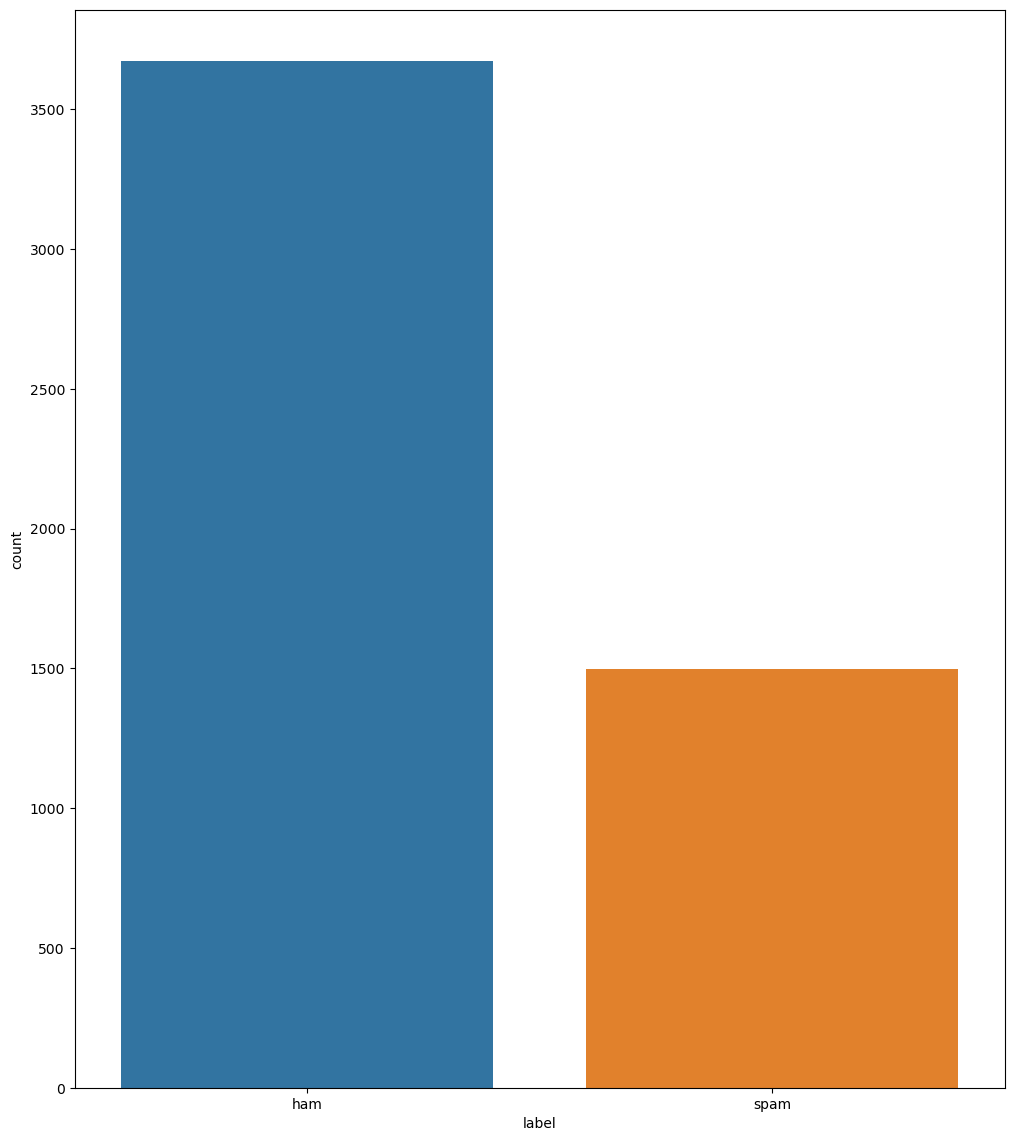

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 14))
sns.countplot(x='label', data=df_spam)
plt.show()

In [39]:
ham_msg = df_spam[df_spam.label =='ham']
spam_msg =  df_spam[df_spam.label == 'spam']

In [41]:
#  randomly taking data from ham_msg
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)

In [43]:
print(ham_msg.shape,spam_msg.shape)

(1499, 4) (1499, 4)


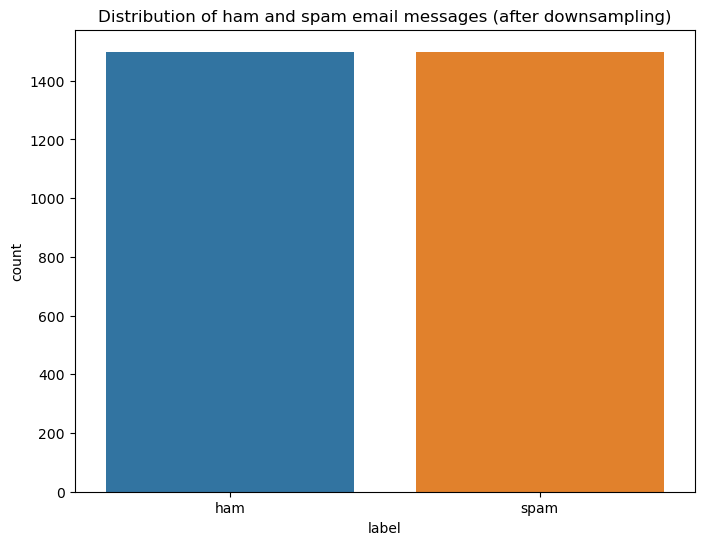

In [47]:
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=balanced_data)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.show()

In [49]:
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...,0
1,2982,ham,Subject: feb 01 prod : sale to teco gas proces...,0
2,2711,ham,Subject: california energy crisis\r\ncaliforni...,0
3,3116,ham,Subject: re : nom / actual volume for april 23...,0
4,1314,ham,Subject: eastrans nomination changes effective...,0


In [53]:
balanced_data['label_num']=balanced_data['label'].map({'ham':0,'spam': 1})

In [115]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['text'],balanced_data['label_num'],test_size=0.2,random_state=434)

In [117]:
vocab_size=500
oov_tok='<OOV>'
max_len=50


In [119]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [121]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 '\r': 2,
 'the': 3,
 'to': 4,
 'and': 5,
 'of': 6,
 'a': 7,
 'for': 8,
 'you': 9,
 'in': 10,
 'subject': 11,
 'is': 12,
 'ect': 13,
 'this': 14,
 'on': 15,
 "'": 16,
 'i': 17,
 'your': 18,
 'hou': 19,
 'that': 20,
 'be': 21,
 'we': 22,
 'with': 23,
 'from': 24,
 'have': 25,
 's': 26,
 'enron': 27,
 '3': 28,
 'it': 29,
 'are': 30,
 'will': 31,
 'as': 32,
 'at': 33,
 'or': 34,
 'not': 35,
 'by': 36,
 'please': 37,
 'if': 38,
 '1': 39,
 '2': 40,
 '2000': 41,
 'our': 42,
 'me': 43,
 'all': 44,
 'gas': 45,
 'com': 46,
 'e': 47,
 'can': 48,
 'deal': 49,
 'http': 50,
 'any': 51,
 '10': 52,
 'has': 53,
 'cc': 54,
 'meter': 55,
 'no': 56,
 're': 57,
 'ect\r': 58,
 'd': 59,
 'the\r': 60,
 '000': 61,
 '5': 62,
 'an': 63,
 't': 64,
 '0': 65,
 'hpl': 66,
 'get': 67,
 'daren': 68,
 'was': 69,
 'company': 70,
 '4': 71,
 'may': 72,
 'new': 73,
 '00': 74,
 'do': 75,
 'up': 76,
 'know': 77,
 'price': 78,
 'thanks': 79,
 'need': 80,
 'corp': 81,
 'out': 82,
 'information': 83,
 'only': 84,


In [123]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [125]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [129]:
#model
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [131]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')


In [133]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)

Epoch 1/30


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 - 4s - 47ms/step - accuracy: 0.7273 - loss: 0.6572 - val_accuracy: 0.8350 - val_loss: 0.5908
Epoch 2/30
75/75 - 0s - 3ms/step - accuracy: 0.8766 - loss: 0.4821 - val_accuracy: 0.9017 - val_loss: 0.3706
Epoch 3/30
75/75 - 0s - 3ms/step - accuracy: 0.9229 - loss: 0.2938 - val_accuracy: 0.9133 - val_loss: 0.2533
Epoch 4/30
75/75 - 0s - 3ms/step - accuracy: 0.9295 - loss: 0.2124 - val_accuracy: 0.9233 - val_loss: 0.2042
Epoch 5/30
75/75 - 0s - 3ms/step - accuracy: 0.9445 - loss: 0.1729 - val_accuracy: 0.9283 - val_loss: 0.1750
Epoch 6/30
75/75 - 0s - 3ms/step - accuracy: 0.9508 - loss: 0.1498 - val_accuracy: 0.9400 - val_loss: 0.1620
Epoch 7/30
75/75 - 0s - 3ms/step - accuracy: 0.9529 - loss: 0.1415 - val_accuracy: 0.9400 - val_loss: 0.1588
Epoch 8/30
75/75 - 0s - 3ms/step - accuracy: 0.9537 - loss: 0.1331 - val_accuracy: 0.9417 - val_loss: 0.1529
Epoch 9/30
75/75 - 0s - 3ms/step - accuracy: 0.9616 - loss: 0.1176 - val_accuracy: 0.9450 - val_loss: 0.1375
Epoch 10/30
75/75 - 0s - 4ms/

In [135]:
model.evaluate(Testing_pad, test_labels)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - loss: 0.1402 


[0.12050403654575348, 0.95333331823349]

Text(0.5, 0, 'epoch')

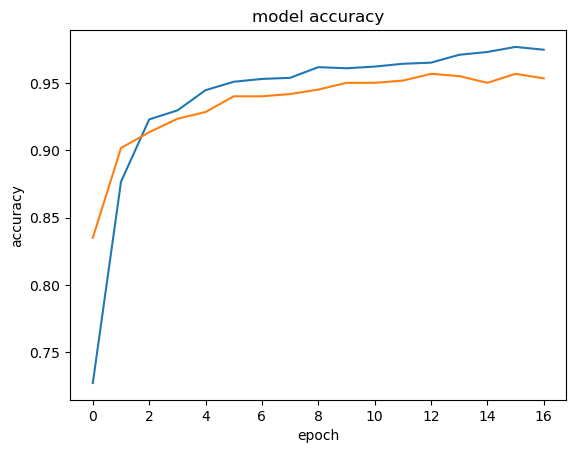

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [139]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's "]

In [141]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[0.9776893 ],
       [0.96573025],
       [0.94263756]], dtype=float32)